In [1]:
import Ab as ab
import datetime as dt
import pandas as pd
sd = dt.datetime(2017,3,28)
ed = dt.datetime(2018,4,4)
# 1x leveraged nasdaq 100 etf
qqq = ab.StockData('QQQ')
qqq.get_data_from_yfinance('QQQ',sd,ed+dt.timedelta(days=1))

qld = ab.StockData('QLD')
qld.get_data_from_yfinance('QLD',sd,ed+dt.timedelta(days=1))

tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ',sd,ed+dt.timedelta(days=1))

spy = ab.StockData('SPY')
spy.get_data_from_yfinance('SPY',sd,ed+dt.timedelta(days=1))

ticker = tqqq

naa200r = ab.StockData('NAA200R')
naa200r.get_data_from_csv('data/NAA200R.csv')

ndxa200r = ab.StockData('NDXA200R')
ndxa200r.get_data_from_csv('data/NDXA200R.csv')


spxa200r = ab.StockData('SPXA200R')
spxa200r.get_data_from_csv('data/SPXA200R.csv')
indicator = naa200r






GPU acceleration is available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

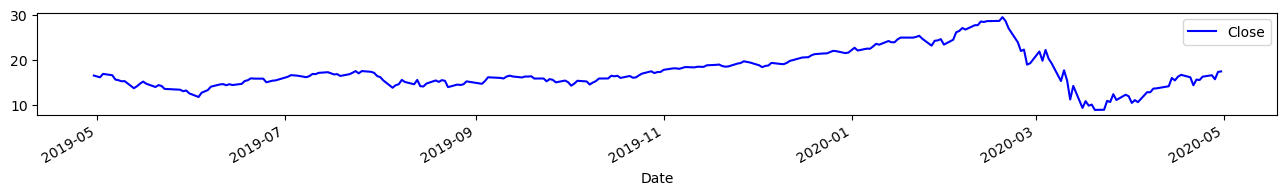

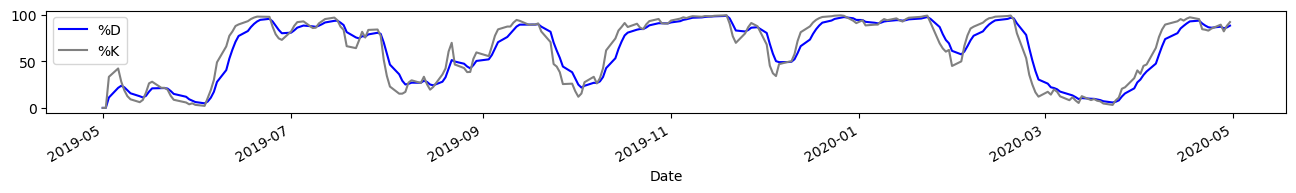

In [19]:
#Fast Stochastic Oscillator:
#Fast %K = %K basic calculation
#Fast %D = 5-period SMA of Fast %K
tqqq.get_k('Close', 14)
tqqq.get_ema('Close-K14', 5)

#Slow Stochastic Oscillator:
#Slow %K = 5-period EMA of Fast %K
#Slow %D = 5-period EMA of Slow %K
tqqq.get_ema('Close-K14', 5)
tqqq.get_ema('Close-K14-EMA5', 5)
tqqq.data.rename(columns={'Close-K14-EMA5-EMA5':'%D', 'Close-K14-EMA5':'%K'}, inplace=True)
tqqq.data.plot(y=['Close'], figsize=(16,1.5), sharey=True, color=['blue'])
#plotting the slow stochastic oscillator with blue and green lines
tqqq.data.plot(y=['%D','%K'], figsize=(16,1.5), sharey=True, color=['blue', 'grey'])


In [3]:
tqqq_weekly = ab.StockData('TQQQ')
tqqq_weekly.get_data_history_from_yfinance(ticker='TQQQ',period=None, interval='1wk',start_date=sd,end_date=ed+dt.timedelta(days=1))


<Axes: xlabel='Date'>

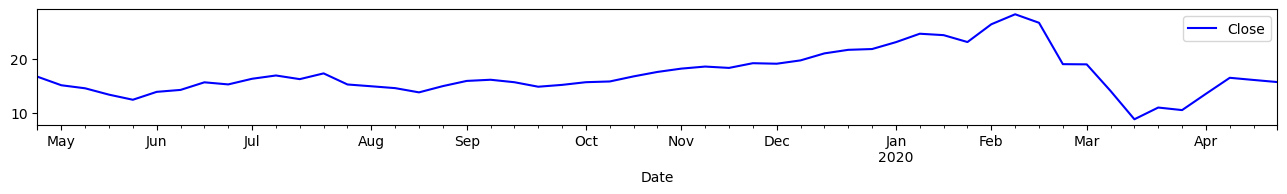

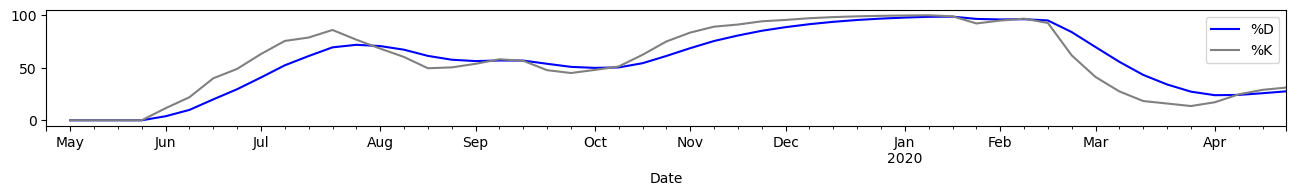

In [18]:
#Fast Stochastic Oscillator:
#Fast %K = %K basic calculation
#Fast %D = 5-period SMA of Fast %K
tqqq_weekly.get_k('Close', 14)
tqqq_weekly.get_ema('Close-K14', 5)

#Slow Stochastic Oscillator:
#Slow %K = 5-period EMA of Fast %K
#Slow %D = 5-period EMA of Slow %K
tqqq_weekly.get_ema('Close-K14', 5)
tqqq_weekly.get_ema('Close-K14-EMA5', 5)
#rename to %K and %D
tqqq_weekly.data.rename(columns={'Close-K14-EMA5-EMA5':'%D', 'Close-K14-EMA5':'%K'}, inplace=True)

tqqq_weekly.data.plot(y=['Close'], figsize=(16,1.5), sharey=True, color=['blue'])

#plotting the slow stochastic oscillator with blue and green lines
tqqq_weekly.data.plot(y=['%D', '%K'], figsize=(16,1.5), sharey=True, color=['blue', 'grey'],)

In [5]:
test_start = sd
test_end = ed


In [6]:
#buy and hold
import time
bah = ab.BuyAndHold(ticker)
#time the execution of the strategy
start_time = time.time()
bah.run_strategy(ticker,test_start,test_end)
print("--- %s seconds ---" % (time.time() - start_time))
bah.trades

--- 0.0008611679077148438 seconds ---


,Date,Signal
0,2019-04-30,1
1,2020-04-30,-1


In [7]:

bah_bt = ab.BackTest()
start_time = time.time()
bah_bt.run_backtest(bah,ticker,test_start,test_end)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.09699416160583496 seconds ---



<Ab.StockData object at 0x7fd2a8085db0>: 
cumulative return      : 5.57%
compound anual return  : -94.4318% 
max_drawdown           : -69.92%
sharp_ratio            : 3.48%
average of daily return: 0.2088%
std of daily return    : 6.0042%
number of trades       : 2,
trading days           : 366,
Betting Average        : 100.00%
Gain Average           : 5.57%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        


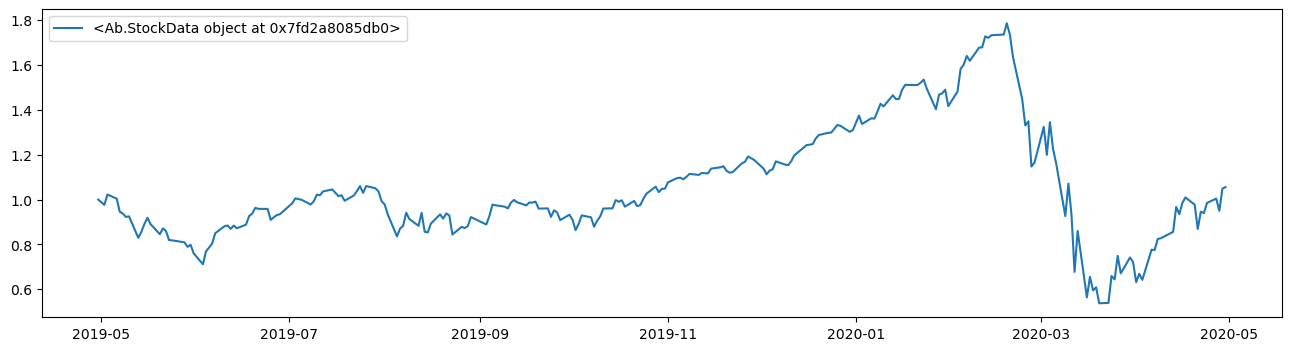

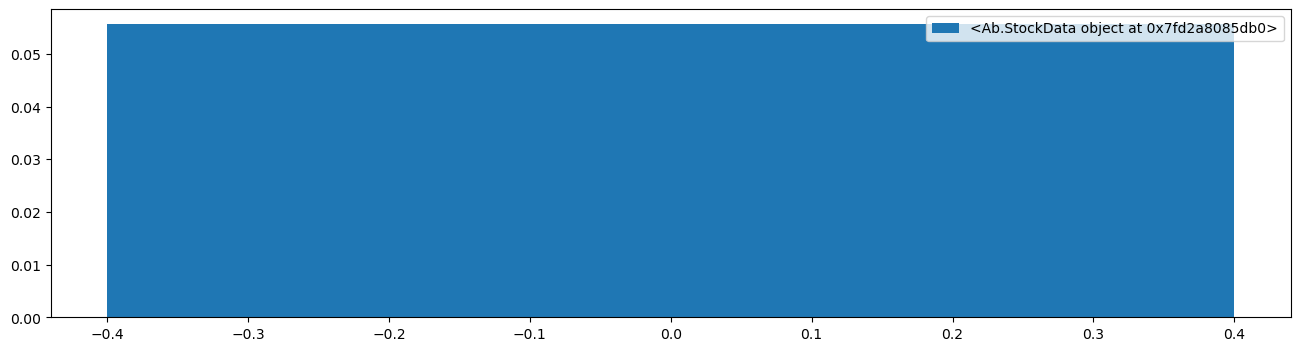

In [8]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()

In [9]:
bah_bt.trade_records

,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2019-04-30,2020-04-30 00:00:00,TQQQ,0.060524,16.522499,17.442499,0.055682,0.055682


In [10]:
#stg = ab.Threshold('NAA200R')
#stg.run_strategy(naa200r, start_date=test_start, end_date=test_end)

#stg = ab.MAThreshold('NAA200R',21, 1,1)
#stg.run_strategy(naa200r, test_start, test_end)

#stg = ab.MACross('MaCross',50,200)
#stg.run_strategy(naa200r, test_start, test_end)

stg = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10)
stg.run_strategy([tqqq,tqqq_weekly], test_start, test_end)


In [11]:
stg.trades


,Date,Signal
0,2019-05-06,0.0
1,2019-05-13,-1.0
2,2019-05-20,0.0
3,2019-06-03,-1.0
4,2019-06-10,1.0
5,2019-06-17,1.0
6,2019-06-24,1.0
7,2019-07-01,1.0
8,2019-07-08,0.0
9,2019-07-15,1.0



StochasticCross: 
cumulative return      : 77.37%
compound anual return  : -22.6293% 
max_drawdown           : -21.82%
sharp_ratio            : 10.50%
average of daily return: 0.2566%
std of daily return    : 2.4444%
number of trades       : 5,
trading days           : 366,
Betting Average        : 75.00%
Gain Average           : 24.87%
Loss Average           : -5.12%
Risk Reward Ratio      : 4.86
Gain STD               : 25.06%
Loss STD               : nan%
        


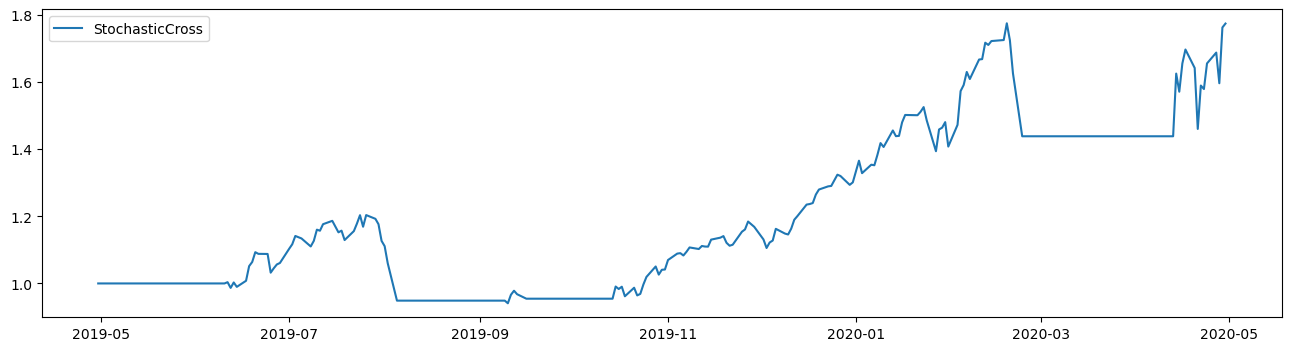

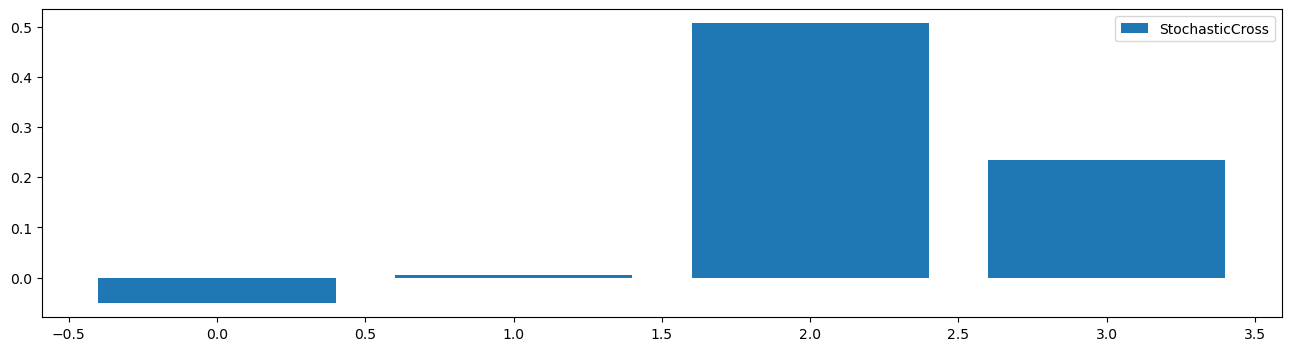

In [12]:
sc_bt = ab.BackTest()
sc_bt.run_backtest(stg,tqqq,test_start,test_end)
sc_bt.plot_balance()
sc_bt.plot_records()
sc_bt.performance_summary()


In [13]:
sc_bt.trade_records

,Buy Date,Sell Date,Ticker,Quant,Buy Price,Sell Price,Profit,Profit %
0,2019-06-10,2019-08-05 00:00:00,TQQQ,0.068705,14.5550,13.810000,-0.051185,-0.051185
1,2019-09-09,2019-09-16 00:00:00,TQQQ,0.059310,15.9975,16.094999,0.005783,0.006095
2,2019-10-14,2020-02-24 00:00:00,TQQQ,0.060123,15.8775,23.920000,0.483537,0.506534
3,2020-04-13,2020-04-30 00:00:00,TQQQ,0.101689,14.1425,17.442499,0.000000,0.233339


In [14]:
naa200r_bt_weekly = ab.BackTest()
naa200r_bt_weekly.run_backtest(stg, ticker,test_start,test_end, True,True)


ZeroDivisionError: division by zero

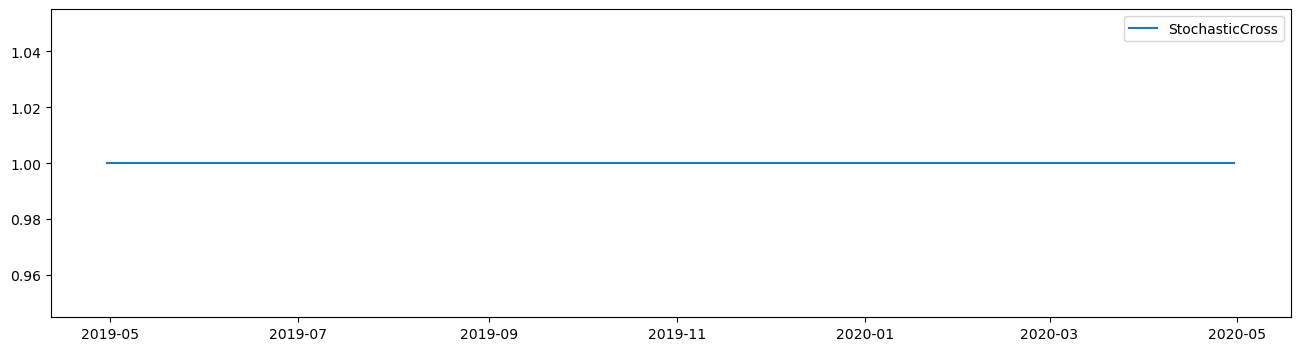

In [15]:
import matplotlib.pyplot as plt
naa200r_bt_weekly.plot_balance()
naa200r_bt_weekly.performance_summary()

plt.savefig('data/{}_naa200r_bt_weekly_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_weekly.trade_records.to_csv('data/{}_naa200r_bt_weekly_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))

In [ ]:
naa200r_bt_weekly.plot_records()
naa200r_bt_weekly.trade_records

In [ ]:
naa200r_bt_daily = ab.BackTest()
naa200r_bt_daily.run_backtest(stg, ticker, test_start,test_end)

In [ ]:
#set print limit for dataframe
pd.set_option('display.max_rows', 10000)
print(naa200r_bt_daily.balance)

In [ ]:
import matplotlib.pyplot as plt
plt.savefig('data/{}_naa200r_bt_daily_{}-{}.png'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.trade_records.to_csv('data/{}_naa200r_15-30-MA20-daily_{}-{}.csv'.format(ticker.ticker,ticker.start_date.date(),ticker.end_date.date()))
naa200r_bt_daily.performance_summary()
naa200r_bt_daily.plot_balance()

In [ ]:
naa200r_bt_daily.plot_records()